In [ ]:
import numpy as np
import cv2

# Load an color image in grayscale
img = cv2.imread('sun.jpg',0) # 0 mean read the image in grayscale
                            # 1 and -1 means read the image normal



cv2.imshow('zoom on sun',img) # "zoom on sun" is the title of window....img is the variable which include the picture
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import numpy as np
import cv2

# Load an color image in grayscale
img = cv2.imread('sun.jpg',0) # 0 mean read the image in grayscale
                            # 1 and -1 means read the image normal


cv2.namedWindow('zoom on sun', cv2.WINDOW_NORMAL)
cv2.imshow('zoom on sun',img) # "zoom on sun" is the title of window....img is the variable which include the picture
cv2.waitKey(0)
cv2.destroyAllWindows()



In [ ]:
import numpy as np
import cv2

img = cv2.imread('sun.jpg',0)
cv2.imshow('image',img)
k = cv2.waitKey(0) & 0xFF
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()
elif k == ord('s'): # wait for 's' key to save and exit
    cv2.imwrite('sun.png',img)
    cv2.destroyAllWindows()

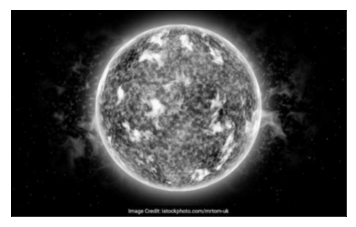

In [53]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('sun.jpg',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

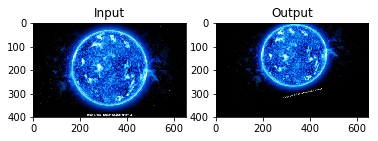

In [27]:
img = cv2.imread('sun.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[0,50],[200,50],[50,200]])
pts2 = np.float32([[30,90],[200,50],[100,200]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

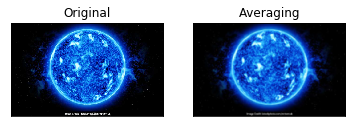

In [56]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sun.jpg')

kernel = np.ones((6,6),np.float32)/36

dst = cv2.filter2D(img,0,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

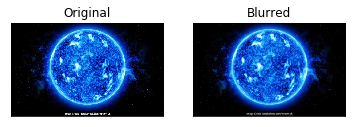

In [51]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sun.jpg')

blur = cv2.blur(img,(3,3))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

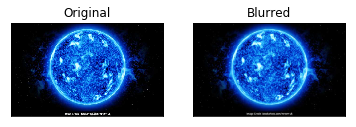

In [64]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sun.jpg')

blur = cv2.GaussianBlur(img,(23,23),1)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('gaussian Blurred')
plt.xticks([]), plt.yticks([])
plt.show()


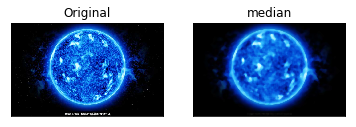

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sun.jpg')

median = cv2.medianBlur(img,11)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('median')
plt.xticks([]), plt.yticks([])
plt.show()

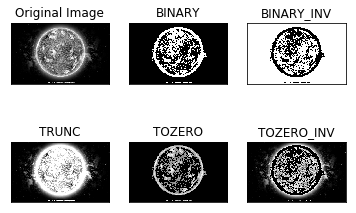

In [73]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sun.jpg',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in xrange(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

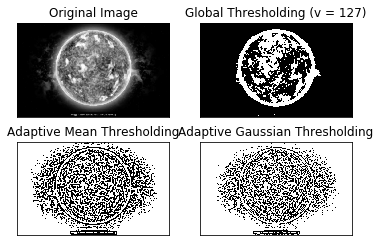

In [74]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sun.jpg',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in xrange(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

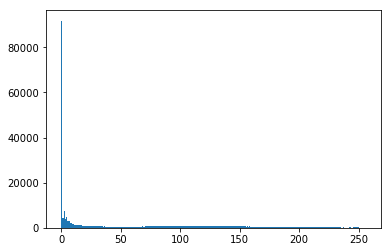

(<matplotlib.axes._subplots.AxesSubplot at 0xe4b3c50>,
 <matplotlib.image.AxesImage at 0xdff22b0>)

In [88]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sun.jpg',0)
plt.hist(img.ravel(),256,[0,256])
plt.show()
plt.subplot(221), plt.imshow(img, 'gray')



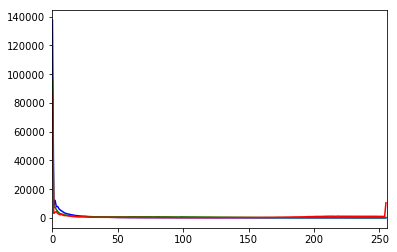

In [83]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sun.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

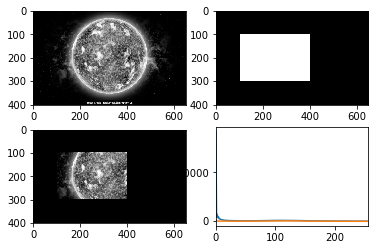

In [89]:
img = cv2.imread('sun.jpg',0)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()